In [11]:
!pip install qiskit
!pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
dfP=pd.read_csv('/content/drive/MyDrive/BARC/TASK4/dfP.csv')

In [16]:
dfP

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,isDefect,pe,ke
0,0,0.003825,0.001347,0.005525,-0.001985,-0.006972,-0.005980,-0.000586,0.004626,0.001530,...,-3.043470e-10,-6.031226e-09,5.120979e-09,-7.840872e-09,-2.096650e-09,-5.553725e-09,1.858695e-10,0,-8.902603,0.000895
1,1,0.001763,-0.008084,0.006813,-0.003498,0.003362,-0.006622,-0.000461,0.001464,0.003428,...,4.339737e-09,7.586031e-10,7.171561e-10,1.638719e-09,-2.092131e-09,-4.035567e-10,2.352198e-09,0,-8.904403,0.001491
2,2,0.004963,0.003467,0.005401,0.003780,-0.003888,-0.004380,-0.006758,0.001401,0.001869,...,5.485539e-09,-2.613686e-09,-2.416793e-09,7.815396e-09,6.426876e-09,5.219551e-09,-7.586865e-10,0,-8.899700,0.003025
3,3,0.003000,-0.001087,0.001941,0.000782,0.001845,0.000707,0.003528,-0.004439,-0.001551,...,7.051671e-09,-2.125558e-08,-1.201596e-08,-1.834104e-08,6.512793e-09,1.773464e-08,-2.398885e-08,0,-8.898062,0.003812
4,4,0.003445,-0.006714,0.000063,0.001721,-0.002016,0.001816,-0.007341,0.005560,0.000230,...,1.078827e-09,7.569973e-09,5.793411e-09,2.474526e-10,2.754343e-09,-4.838079e-09,-5.449803e-09,0,-8.889846,0.003542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,3577,-0.002727,0.000586,0.003844,0.000023,-0.001584,-0.001959,-0.000016,0.000593,-0.006628,...,-1.216839e-08,-4.109494e-09,2.170579e-08,1.293145e-08,2.201835e-08,-1.515806e-09,-1.783529e-08,1,-8.580639,0.017560
3578,3578,-0.008747,-0.006300,-0.001644,0.001251,0.006700,0.004403,0.003435,0.001464,0.004759,...,7.323557e-09,-4.059353e-09,-9.973552e-09,7.784985e-09,-2.720168e-08,8.878110e-09,1.031112e-08,1,-8.547565,0.003423
3579,3579,-0.008084,0.008215,0.000401,-0.003229,0.005353,0.002402,0.000859,0.001315,-0.008147,...,-1.858975e-08,-3.125158e-09,-1.252948e-08,1.558019e-08,-2.164888e-08,3.240638e-08,4.499818e-09,1,-7.802169,0.041790
3580,3580,-0.003191,0.000983,0.007140,-0.000194,-0.000664,-0.000737,-0.004528,0.000588,-0.003859,...,2.043884e-09,6.493303e-09,1.189629e-08,1.569604e-08,-6.772935e-09,3.414580e-09,-1.798798e-08,1,-8.848695,0.017325


In [17]:
dfP.drop('Unnamed: 0',axis=1)

,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,isDefect,pe,ke
0,0.003825,0.001347,0.005525,-0.001985,-0.006972,-0.005980,-0.000586,0.004626,0.001530,-0.001493,...,-3.043470e-10,-6.031226e-09,5.120979e-09,-7.840872e-09,-2.096650e-09,-5.553725e-09,1.858695e-10,0,-8.902603,0.000895
1,0.001763,-0.008084,0.006813,-0.003498,0.003362,-0.006622,-0.000461,0.001464,0.003428,0.001633,...,4.339737e-09,7.586031e-10,7.171561e-10,1.638719e-09,-2.092131e-09,-4.035567e-10,2.352198e-09,0,-8.904403,0.001491
2,0.004963,0.003467,0.005401,0.003780,-0.003888,-0.004380,-0.006758,0.001401,0.001869,0.001232,...,5.485539e-09,-2.613686e-09,-2.416793e-09,7.815396e-09,6.426876e-09,5.219551e-09,-7.586865e-10,0,-8.899700,0.003025
3,0.003000,-0.001087,0.001941,0.000782,0.001845,0.000707,0.003528,-0.004439,-0.001551,0.000707,...,7.051671e-09,-2.125558e-08,-1.201596e-08,-1.834104e-08,6.512793e-09,1.773464e-08,-2.398885e-08,0,-8.898062,0.003812
4,0.003445,-0.006714,0.000063,0.001721,-0.002016,0.001816,-0.007341,0.005560,0.000230,-0.000056,...,1.078827e-09,7.569973e-09,5.793411e-09,2.474526e-10,2.754343e-09,-4.838079e-09,-5.449803e-09,0,-8.889846,0.003542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,-0.002727,0.000586,0.003844,0.000023,-0.001584,-0.001959,-0.000016,0.000593,-0.006628,0.000356,...,-1.216839e-08,-4.109494e-09,2.170579e-08,1.293145e-08,2.201835e-08,-1.515806e-09,-1.783529e-08,1,-8.580639,0.017560
3578,-0.008747,-0.006300,-0.001644,0.001251,0.006700,0.004403,0.003435,0.001464,0.004759,0.000029,...,7.323557e-09,-4.059353e-09,-9.973552e-09,7.784985e-09,-2.720168e-08,8.878110e-09,1.031112e-08,1,-8.547565,0.003423
3579,-0.008084,0.008215,0.000401,-0.003229,0.005353,0.002402,0.000859,0.001315,-0.008147,-0.003508,...,-1.858975e-08,-3.125158e-09,-1.252948e-08,1.558019e-08,-2.164888e-08,3.240638e-08,4.499818e-09,1,-7.802169,0.041790
3580,-0.003191,0.000983,0.007140,-0.000194,-0.000664,-0.000737,-0.004528,0.000588,-0.003859,0.004512,...,2.043884e-09,6.493303e-09,1.189629e-08,1.569604e-08,-6.772935e-09,3.414580e-09,-1.798798e-08,1,-8.848695,0.017325


In [28]:
X = dfP.iloc[:,1:5].values #dfP
Y=dfP.iloc[:,-3].values
y = 2 * Y - 1  # in {-1, +1}

In [27]:
y

array([-1, -1, -1, ...,  1,  1,  1])

In [29]:
import plotly.express as px
num_inputs = 4
# for x, y_target in zip(X, y):
#     if y_target == 1:
#         plt.plot(x[0],x[1], "bo")
#     else:
#         plt.plot(x[0],x[1] ,"go")
# plt.show()

In [30]:
X

array([[ 0.00382467,  0.00134727,  0.00552533, -0.00198484],
       [ 0.00176322, -0.00808416,  0.00681251, -0.00349821],
       [ 0.00496331,  0.00346735,  0.00540078,  0.00377953],
       ...,
       [-0.00808417,  0.00821462,  0.00040068, -0.00322852],
       [-0.00319121,  0.00098283,  0.0071401 , -0.00019382],
       [ 0.02450195,  0.00646628, -0.00064176, -0.00361456]])

In [31]:
X.shape

(3582, 4)

In [32]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
# construct QNN

import pylatexenc
qc = QuantumCircuit(4)
feature_map = ZZFeatureMap(4)
ansatz = RealAmplitudes(4)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
print(qc)

     ┌────────────────────────────────────┐»
q_0: ┤0                                   ├»
     │                                    │»
q_1: ┤1                                   ├»
     │  ZZFeatureMap(x[0],x[1],x[2],x[3]) │»
q_2: ┤2                                   ├»
     │                                    │»
q_3: ┤3                                   ├»
     └────────────────────────────────────┘»
«     ┌────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                       ├
«     │                                                                                                        │
«q_1: ┤1                                                                                                       ├
«     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15]) │
«q_2: ┤2                      

In [34]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [35]:
# QNN maps inputs to [-1, +1]
estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))


array([[-0.20335039]])

In [36]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [37]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

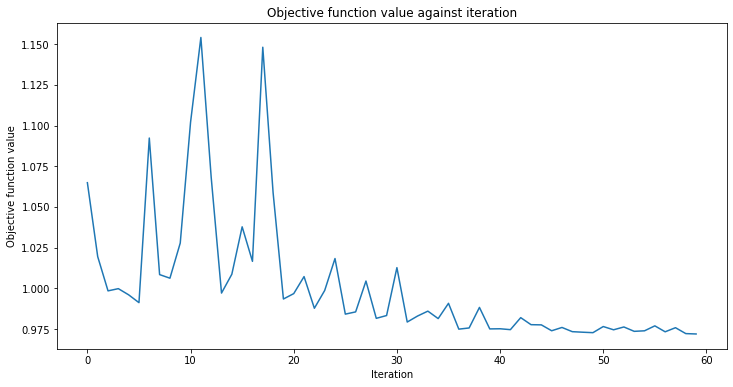

0.6147403685092128

In [38]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)

I tried out with 2 parameters, I ended up with 50.50 accuracy while increasing parmeters i.e, for higher dimensions Quantum Neural Networks works well. However, the computational capacity restricts the higher dimensions above some limit. Change in max_iter also impacts.

In [39]:
# score classifier
estimator_classifier.score(X, y)

0.6147403685092128

In [53]:
# evaluate data points
y_predict = estimator_classifier.predict(X)
y_predict=y_predict.flatten()
y_predict = np.where(y_predict > 0, 1, -1)
print(y_predict)



[-1 -1 -1 ... -1 -1 -1]


We take only 3 features instead of 4 parameters for visualizing.

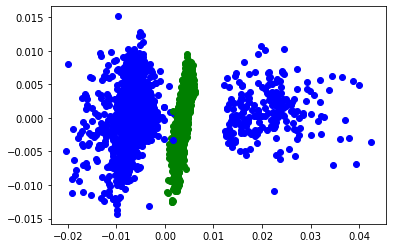

In [55]:
# plot results
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target ==1 & y_p == 1:
      plt.scatter(x[0], x[1], cmap= x[3],c='blue')
    if y_target ==-1 & y_p ==-1:
      plt.scatter(x[0], x[1], cmap=x[3],c='green')



In [41]:
y_predict

array([-1, -1, -1, ..., -1, -1, -1])

In [56]:
estimator_classifier.weights

array([ 1.52446832,  0.78788978,  1.00492517,  1.91183034,  1.78331132,
        0.31608293,  1.04917306,  0.58998652,  1.39269526,  0.30671095,
        0.18211094,  0.38189085, -0.01444137,  0.49537187,  1.21717349,
        0.76419391])


## VQC

In [44]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(4)
ansatz = RealAmplitudes(4, reps=1)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(maxiter=30),
    callback=callback_graph,
)

In [57]:
y_one_hot = np.zeros((3582, 2))
for i in range(3582):
    y_one_hot[i, Y[i]] = 1

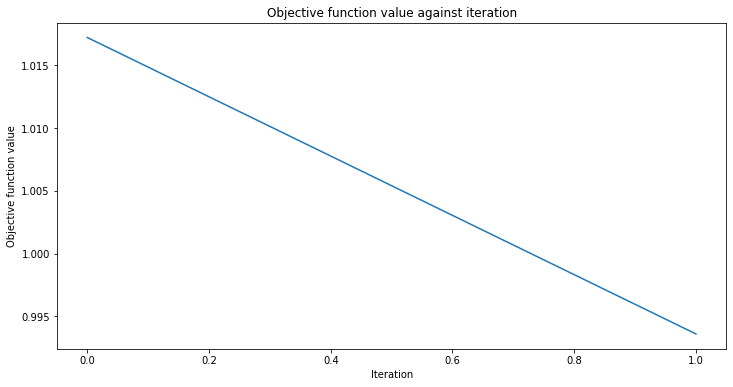

KeyboardInterrupt: ignored

In [58]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X,y_one_hot)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y_one_hot)

In [ ]:
# evaluate data points
y_predict = estimator_classifier.predict(X)
y_predict=y_predict.flatten()
y_predict = np.where(y_predict > 0, 1, -1)
y_predict

In [ ]:
# plot results

for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1 & y_p==1:
        plt.scatter(x[0], x[1],cmap=x[2], c="blue")
    else:
        plt.scatter(x[0], x[1],cmap=x[2],c= "green")


In [ ]:
from qiskit.circuit.library import EfficientSU2
import time
ansatz = EfficientSU2(num_qubits=4, reps=3)
optimizer = COBYLA(maxiter=40)
from qiskit.primitives import Sampler

sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X,y_one_hot)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(X, y_one_hot)
test_score_q2_eff = vqc.score(X, y_one_hot)

In [ ]:
train_score_q2_eff,test_score_q2_eff